<a href="https://colab.research.google.com/github/PhamNguyenDucThienJB/ML_2023/blob/main/Lab_7_20130410_PhamNguyenDucThien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [ ]:
# code
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import datasets
from sklearn import svm
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
# code
iris=datasets.load_iris()
# data
x= iris['data']
y= iris['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=43)
clf=svm.SVC(kernel='sigmoid', random_state=0)
scores = cross_validate(clf ,x ,y, scoring= 'accuracy' , cv=10 )
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
# code
iris=datasets.load_iris()
# data
x= iris['data']
y= iris['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=43)


In [ ]:
selector = SelectKBest(chi2,k=3)
X_selector = selector.fit_transform(x ,y)

In [ ]:
clf=RandomForestClassifier(random_state=42)
clf.fit(X_selector ,y)
scores= cross_val_score(clf,x,y,cv=10)

#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [ ]:
# importing libraries
from sklearn.cluster import KMeans
from sklearn import datasets

# loading dataset

mnist = datasets.load_digits()
# building model

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(3, 64)

In [ ]:
from sklearn.metrics import accuracy_score
print (accuracy_score(mnist.target, clusters))

0.0790205898720089


In [ ]:
from sklearn.metrics.cluster import completeness_score
print (completeness_score(mnist.target, clusters))

0.6308376491243124


In [ ]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

labels = np.zeros_like(clusters)
print(labels)
for i in range(3):
  print(i, '------------------------------')
  mask = (clusters == i)
  print(mask)
  labels[mask] = mode(mnist.target[mask])[0]
  print(labels) 
accuracy_score(mnist.target, labels)

[0 0 0 ... 0 0 0]
0 ------------------------------
[False False False ... False  True  True]
[0 0 0 ... 0 3 3]
1 ------------------------------
[False  True  True ...  True False False]
[0 7 7 ... 7 3 3]
2 ------------------------------
[ True False False ... False False False]
[6 7 7 ... 7 3 3]


<ipython-input-20-1ec2d0bc5e76>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(mnist.target[mask])[0]


0.2921535893155259

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
# code
# loading dataset
mnist = datasets.load_digits()
# data
x= iris['data']
y= iris['target']

In [ ]:
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
nb = GaussianNB()

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
rf_scores = cross_validate(rf, x, y, cv=10, scoring=scoring)
knn_scores = cross_validate(knn, x, y, cv=10, scoring=scoring)
nb_scores = cross_validate(nb, x, y, cv=10, scoring=scoring)

*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code
#  Supervised learning

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
from google.colab import drive
drive.mount('/content/Mydrive')
%cd '/content/Mydrive/MyDrive/ML_2023'

Mounted at /content/Mydrive
/content/Mydrive/MyDrive/ML_2023


In [ ]:
# code
file= pd.read_csv('shopping-data1.csv')
# file
data = file.drop(['CustomerID', 'Genre'], axis=1)

In [ ]:
dist_matrix = pdist(data)
link_matrix = linkage(dist_matrix, method='complete')

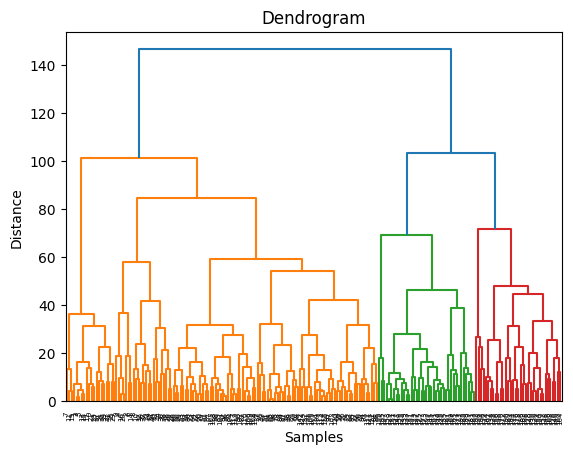

In [ ]:

dendrogram(link_matrix)

plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')


plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [10]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('shopping-data1.csv')



k_values = range(2, 11)



*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

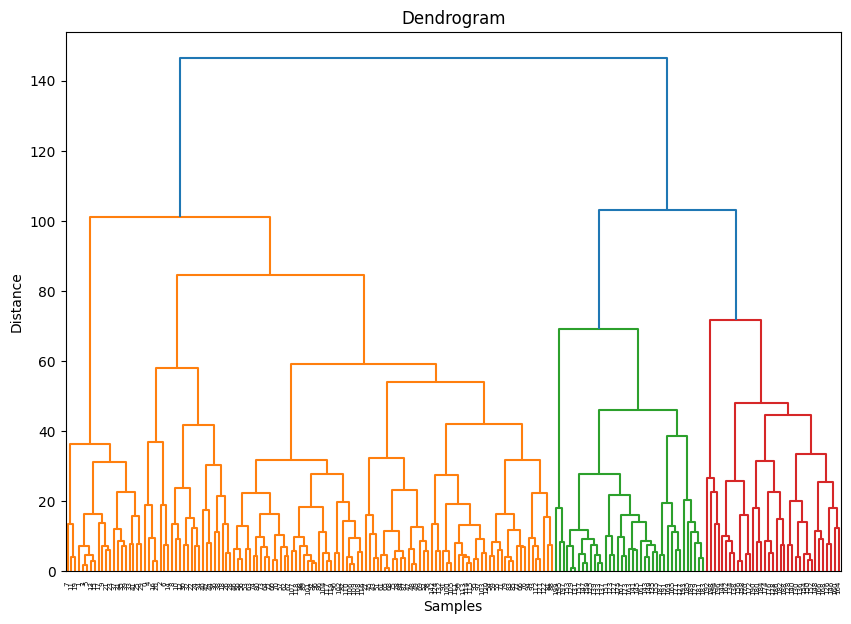

In [ ]:
#code
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# load  dataset
data= pd.read_csv('shopping-data1.csv')

# drop 
data = data.drop(['CustomerID', 'Genre'], axis=1)

plt.figure(figsize=(10, 7))
dendrogram(linkage(data, method='complete'))
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(data)

print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#Finally,
Save a copy in your Github. Remember renaming the notebook.